In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [3]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [4]:
df=df[df['location']=='Bangladesh']
df=df[['date','new_cases']]

In [5]:
df

,date,new_cases
4343,2020-03-03,NaN
4344,2020-03-04,NaN
4345,2020-03-05,NaN
4346,2020-03-06,NaN
4347,2020-03-07,NaN
...,...,...
4563,2020-10-09,1441.0
4564,2020-10-10,1278.0
4565,2020-10-11,1203.0
4566,2020-10-12,1193.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


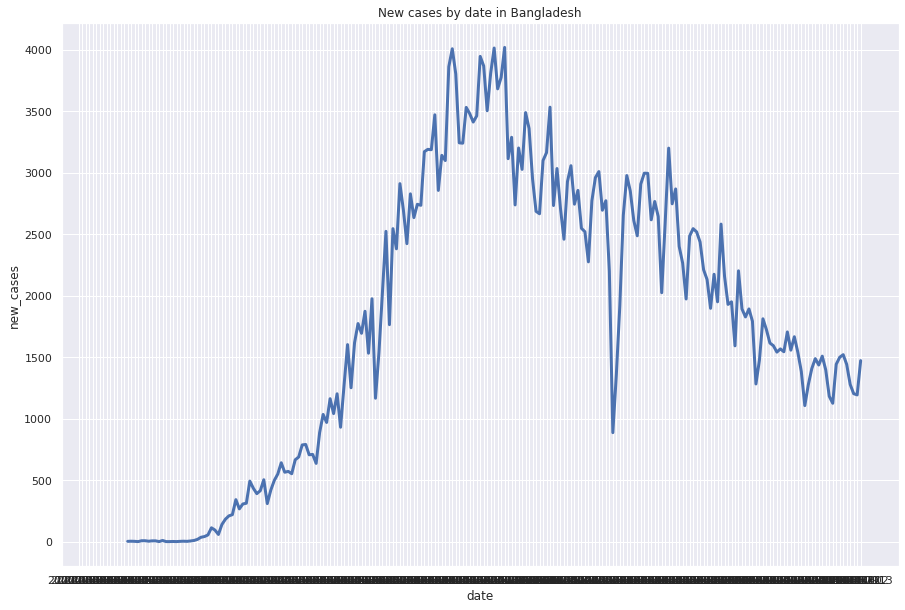

In [6]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Bangladesh')
plt.show()


#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [7]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [8]:
case_series=case_series.fillna(0)
case_series

,new_cases
4343,0.0
4344,0.0
4345,0.0
4346,0.0
4347,0.0
...,...
4563,1441.0
4564,1278.0
4565,1203.0
4566,1193.0


In [9]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
timestep=10
X_case, y_case = create_dataset(case_series, timestep)


In [11]:
train_size=int(len(case_series)*0.85)

In [12]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [13]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [14]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
6/6 - 0s - loss: 8436304.0000
Epoch 2/600
6/6 - 0s - loss: 7108468.0000
Epoch 3/600
6/6 - 0s - loss: 6185092.5000
Epoch 4/600
6/6 - 0s - loss: 5739703.0000
Epoch 5/600
6/6 - 0s - loss: 5489707.0000
Epoch 6/600
6/6 - 0s - loss: 5143690.0000
Epoch 7/600
6/6 - 0s - loss: 4712378.5000
Epoch 8/600
6/6 - 0s - loss: 3620318.5000
Epoch 9/600
6/6 - 0s - loss: 2387392.0000
Epoch 10/600
6/6 - 0s - loss: 744292.6875
Epoch 11/600
6/6 - 0s - loss: 337956.6875
Epoch 12/600
6/6 - 0s - loss: 242548.9375
Epoch 13/600
6/6 - 0s - loss: 183009.9219
Epoch 14/600
6/6 - 0s - loss: 244546.7500
Epoch 15/600
6/6 - 0s - loss: 394963.0625
Epoch 16/600
6/6 - 0s - loss: 401827.0312
Epoch 17/600
6/6 - 0s - loss: 321217.4375
Epoch 18/600
6/6 - 0s - loss: 311868.8750
Epoch 19/600
6/6 - 0s - loss: 290926.0312
Epoch 20/600
6/6 - 0s - loss: 302157.2500
Epoch 21/600
6/6 - 0s - loss: 248474.6562
Epoch 22/600
6/6 - 0s - loss: 204162.5625
Epoch 23/600
6/6 - 0s - loss: 196353.5156
Epoch 24/600
6/6 - 0s - loss: 1918

# **Check validation data:**

In [15]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [16]:
x_input

array([2545., 2519., 2436., 2211., 2131., 1897., 2174., 1950., 2582.,
       2158.], dtype=float32)

In [17]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[2179.8882]
1 day input [2519.     2436.     2211.     2131.     1897.     2174.     1950.
 2582.     2158.     2179.8882]
[2519.     2436.     2211.     2131.     1897.     2174.     1950.
 2582.     2158.     2179.8882]
[[[2519.    ]
  [2436.    ]
  [2211.    ]
  [2131.    ]
  [1897.    ]
  [2174.    ]
  [1950.    ]
  [2582.    ]
  [2158.    ]
  [2179.8882]]]
1 day output [[2083.3816]]
2 day input [2436.     2211.     2131.     1897.     2174.     1950.     2582.
 2158.     2179.8882 2083.3816]
[2436.     2211.     2131.     1897.     2174.     1950.     2582.
 2158.     2179.8882 2083.3816]
[[[2436.    ]
  [2211.    ]
  [2131.    ]
  [1897.    ]
  [2174.    ]
  [1950.    ]
  [2582.    ]
  [2158.    ]
  [2179.8882]
  [2083.3816]]]
2 day output [[2080.048]]
3 day input [2211.     2131.     1897.     2174.     1950.     2582.     2158.
 2179.8882 2083.3816 2080.048 ]
[2211.     2131.     1897.     2174.     1950.     2582.     2158.
 2179.8882 2083.3816 2080.048 ]
[[[2211.    ]
  [2131

In [18]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [19]:
lst_output=numpy.array(lst_output)
lst_output

array([2179.8882, 2083.3816, 2080.048 , 2303.5269, 2288.8977, 2157.0288,
       2131.5845, 2091.1528, 2064.1125, 2088.1228, 2131.5874, 2074.4656,
       2051.8938, 2022.684 , 1992.3594, 1961.1936, 1946.3167, 1922.045 ,
       1911.2883, 1901.052 , 1887.1515, 1867.1897, 1844.4995, 1818.7412,
       1798.1249, 1781.6238, 1765.1052, 1748.9688, 1733.6896, 1718.3031,
       1702.1345, 1684.5703, 1666.1282, 1648.1852], dtype=float32)

No handles with labels found to put in legend.


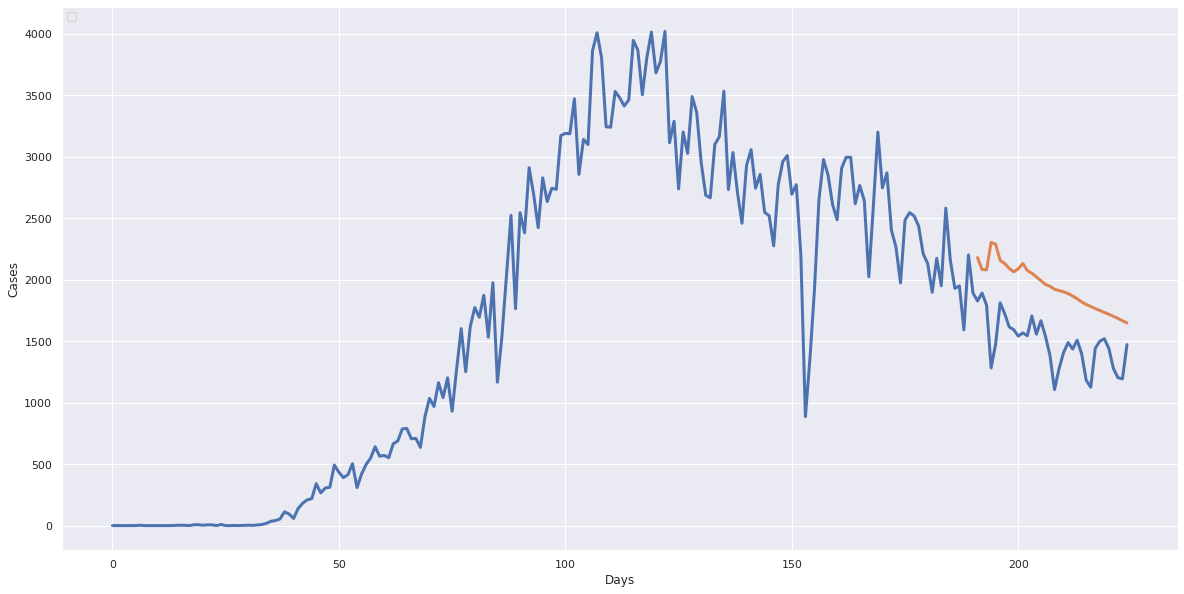

In [20]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [21]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [22]:

x_input

array([1182., 1125., 1442., 1499., 1520., 1441., 1278., 1203., 1193.,
       1472.], dtype=float32)

In [23]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[1448.1377]
1 day input [1125.     1442.     1499.     1520.     1441.     1278.     1203.
 1193.     1472.     1448.1377]
[1125.     1442.     1499.     1520.     1441.     1278.     1203.
 1193.     1472.     1448.1377]
[[[1125.    ]
  [1442.    ]
  [1499.    ]
  [1520.    ]
  [1441.    ]
  [1278.    ]
  [1203.    ]
  [1193.    ]
  [1472.    ]
  [1448.1377]]]
1 day output [[1390.3743]]
2 day input [1442.     1499.     1520.     1441.     1278.     1203.     1193.
 1472.     1448.1377 1390.3743]
[1442.     1499.     1520.     1441.     1278.     1203.     1193.
 1472.     1448.1377 1390.3743]
[[[1442.    ]
  [1499.    ]
  [1520.    ]
  [1441.    ]
  [1278.    ]
  [1203.    ]
  [1193.    ]
  [1472.    ]
  [1448.1377]
  [1390.3743]]]
2 day output [[1297.9778]]
3 day input [1499.     1520.     1441.     1278.     1203.     1193.     1472.
 1448.1377 1390.3743 1297.9778]
[1499.     1520.     1441.     1278.     1203.     1193.     1472.
 1448.1377 1390.3743 1297.9778]
[[[1499.    ]
  [152

In [24]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


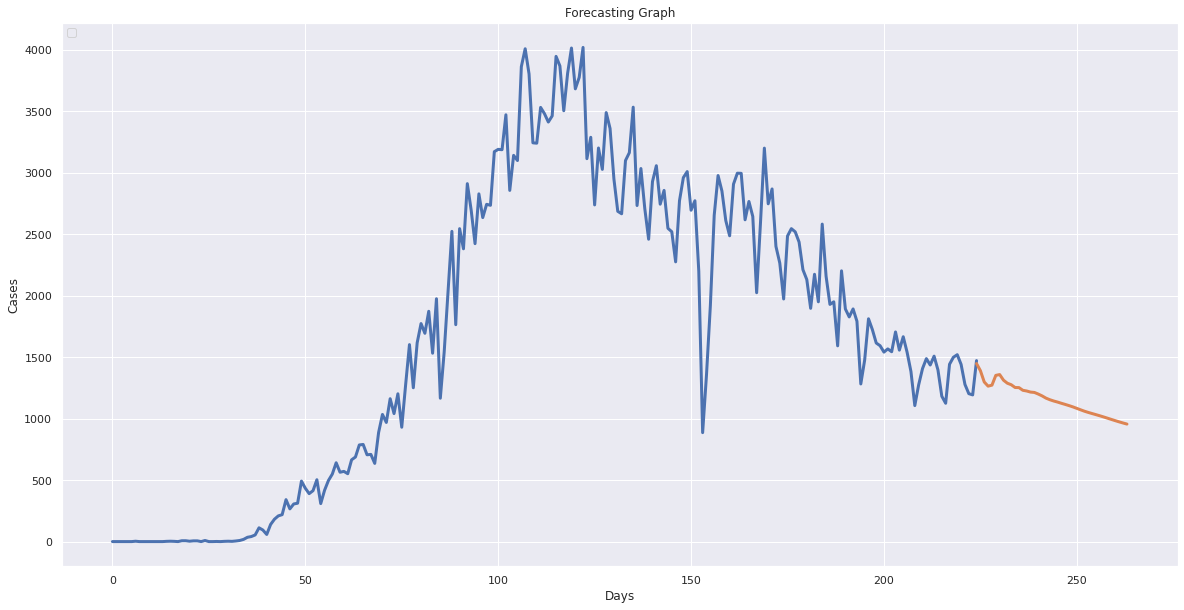

In [25]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()